### Penilaian Praktikum AI


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#### 1. Pengolahan Data 

In [ ]:
# Baca file data_customer.csv menggunakan pandas.
dataset = pd.read_csv('data/data_customer.csv')


In [ ]:
# Tampilkan 5 data pertama.
dataset.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [ ]:
# Tampilkan informasi awal dataset: jumlah data, nama kolom, dan tipe data
print("=== Jumlah data ===")
x, y = dataset.shape
print(f"Jumlah data: {x}")
print(f"Jumlah baris: {y}")

print("\n=== nama kolom dan tipe data ===")
dataset.dtypes

=== Jumlah data ===
Jumlah data: 20
Jumlah baris: 4

=== nama kolom dan tipe data ===


CustomerID       int64
Age              int64
AnnualIncome     int64
SpendingScore    int64
dtype: object

#### 2. Pembersihan Data

In [ ]:
# Chek apakah ada missing value.?
dataset.isnull().sum()

CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [16]:
# Tangani data yang hilang (jika ada) dengan pendekatan yang tepat 
print("Tidak ada data yang hilang")

Tidak ada data yang hilang


In [112]:
def remove_outlier_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

In [113]:
for col in ['Age', 'AnnualIncome', 'SpendingScore']:
    before = dataset.shape[0]
    dataset = remove_outlier_iqr(dataset, col)
    after = dataset.shape[0]
    print(f"Outlier dihapus pada kolom {col}: {before - after} baris dihapus.")

Outlier dihapus pada kolom Age: 3 baris dihapus.
Outlier dihapus pada kolom AnnualIncome: 0 baris dihapus.
Outlier dihapus pada kolom SpendingScore: 0 baris dihapus.


#### 3. Pemrosesan Data

In [114]:
scaler = MinMaxScaler()
df = dataset.copy()

df[['Age', 'AnnualIncome', 'SpendingScore']]= scaler.fit_transform(dataset[['Age', 'AnnualIncome', 'SpendingScore']])

In [115]:
print("Before")
dataset.head()

Before


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [94]:
print("After")
df.head()

After


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,0.020408,0.000000,0.375000
1,2,0.061224,0.000000,0.812500
2,3,0.040816,0.111111,0.031250
3,4,0.102041,0.111111,0.770833
4,5,0.265306,0.222222,0.385417


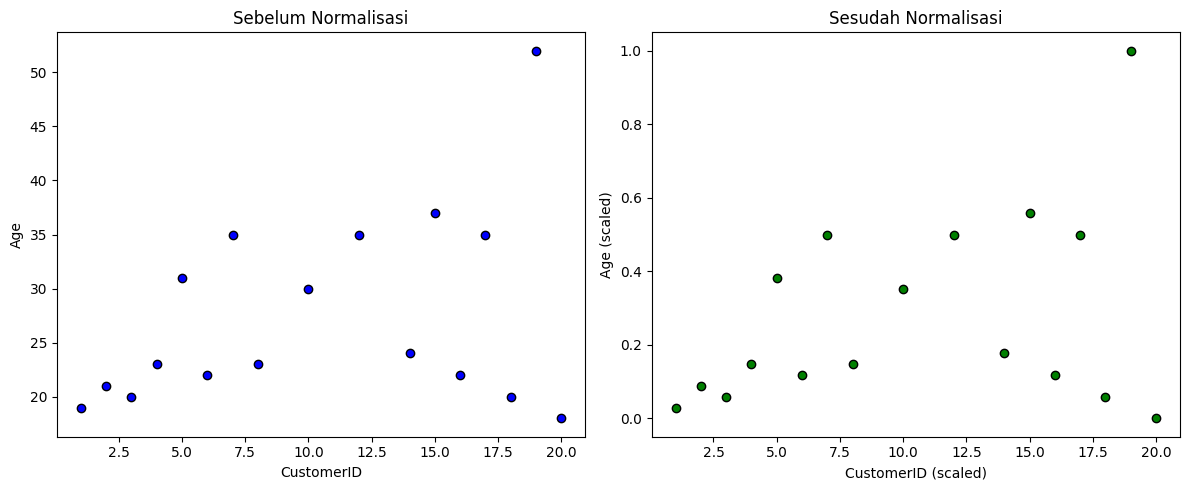

In [116]:

x_col = dataset.columns[0]
y_col = dataset.columns[1]

plt.figure(figsize=(12, 5))

# Scatter plot sebelum normalisasi
plt.subplot(1, 2, 1)
plt.scatter(dataset[x_col], dataset[y_col], color='blue', edgecolor='black')
plt.title('Sebelum Normalisasi')
plt.xlabel(x_col)
plt.ylabel(y_col)

# Scatter plot sesudah normalisasi
plt.subplot(1, 2, 2)
plt.scatter(df[x_col], df[y_col], color='green', edgecolor='black')
plt.title('Sesudah Normalisasi')
plt.xlabel(x_col + ' (scaled)')
plt.ylabel(y_col + ' (scaled)')

plt.tight_layout()
plt.show()

#### 4. Clustering K-Means

In [117]:
X = dataset.iloc[:, [2, 3]]
X

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
9,19,72
11,20,99


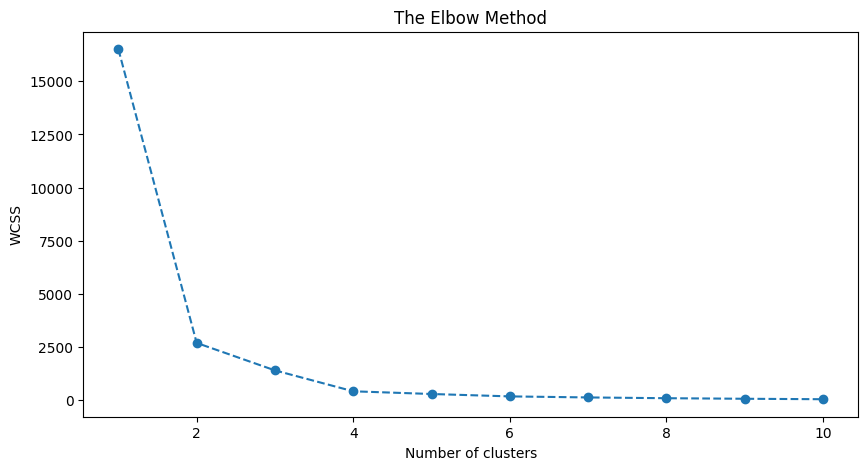

In [118]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [119]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

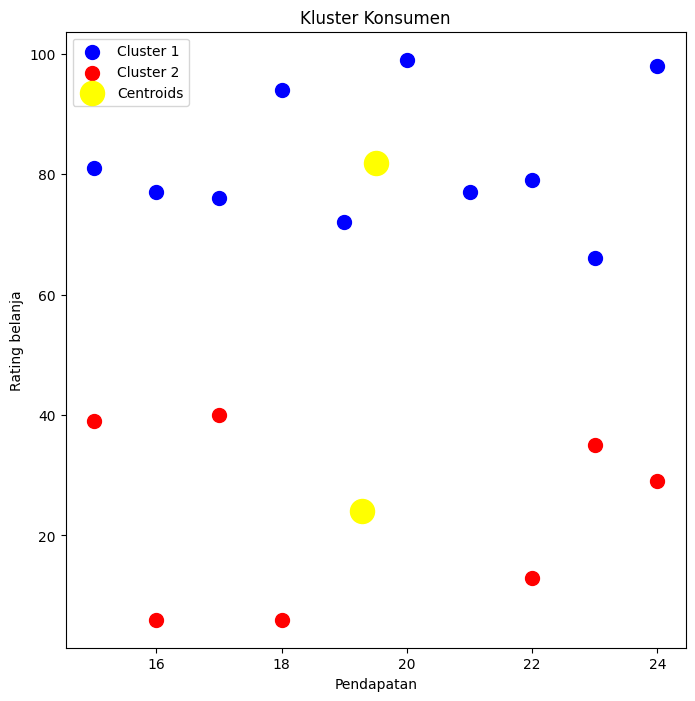

In [120]:
plt.figure(figsize=(8, 8))
X_np = X.values
plt.scatter(X_np[y_kmeans == 0, 0], X_np[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X_np[y_kmeans == 1, 0], X_np[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Kluster Konsumen')
plt.xlabel('Pendapatan')
plt.ylabel('Rating belanja')
plt.legend()
plt.show()